In [1]:
# Assignment 5
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 08.10.2019

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [13]:
#Constants
#Size of trajectory
c = 200
#Initial conditions
x1 = 5
v1 = 1
t = 1
#Variance of acceleration noise
sa = 0
s2a = 0
a = np.random.normal(0,sa,c)
sn = 20
s2n = sn**2
n = np.random.normal(0,sn,c)

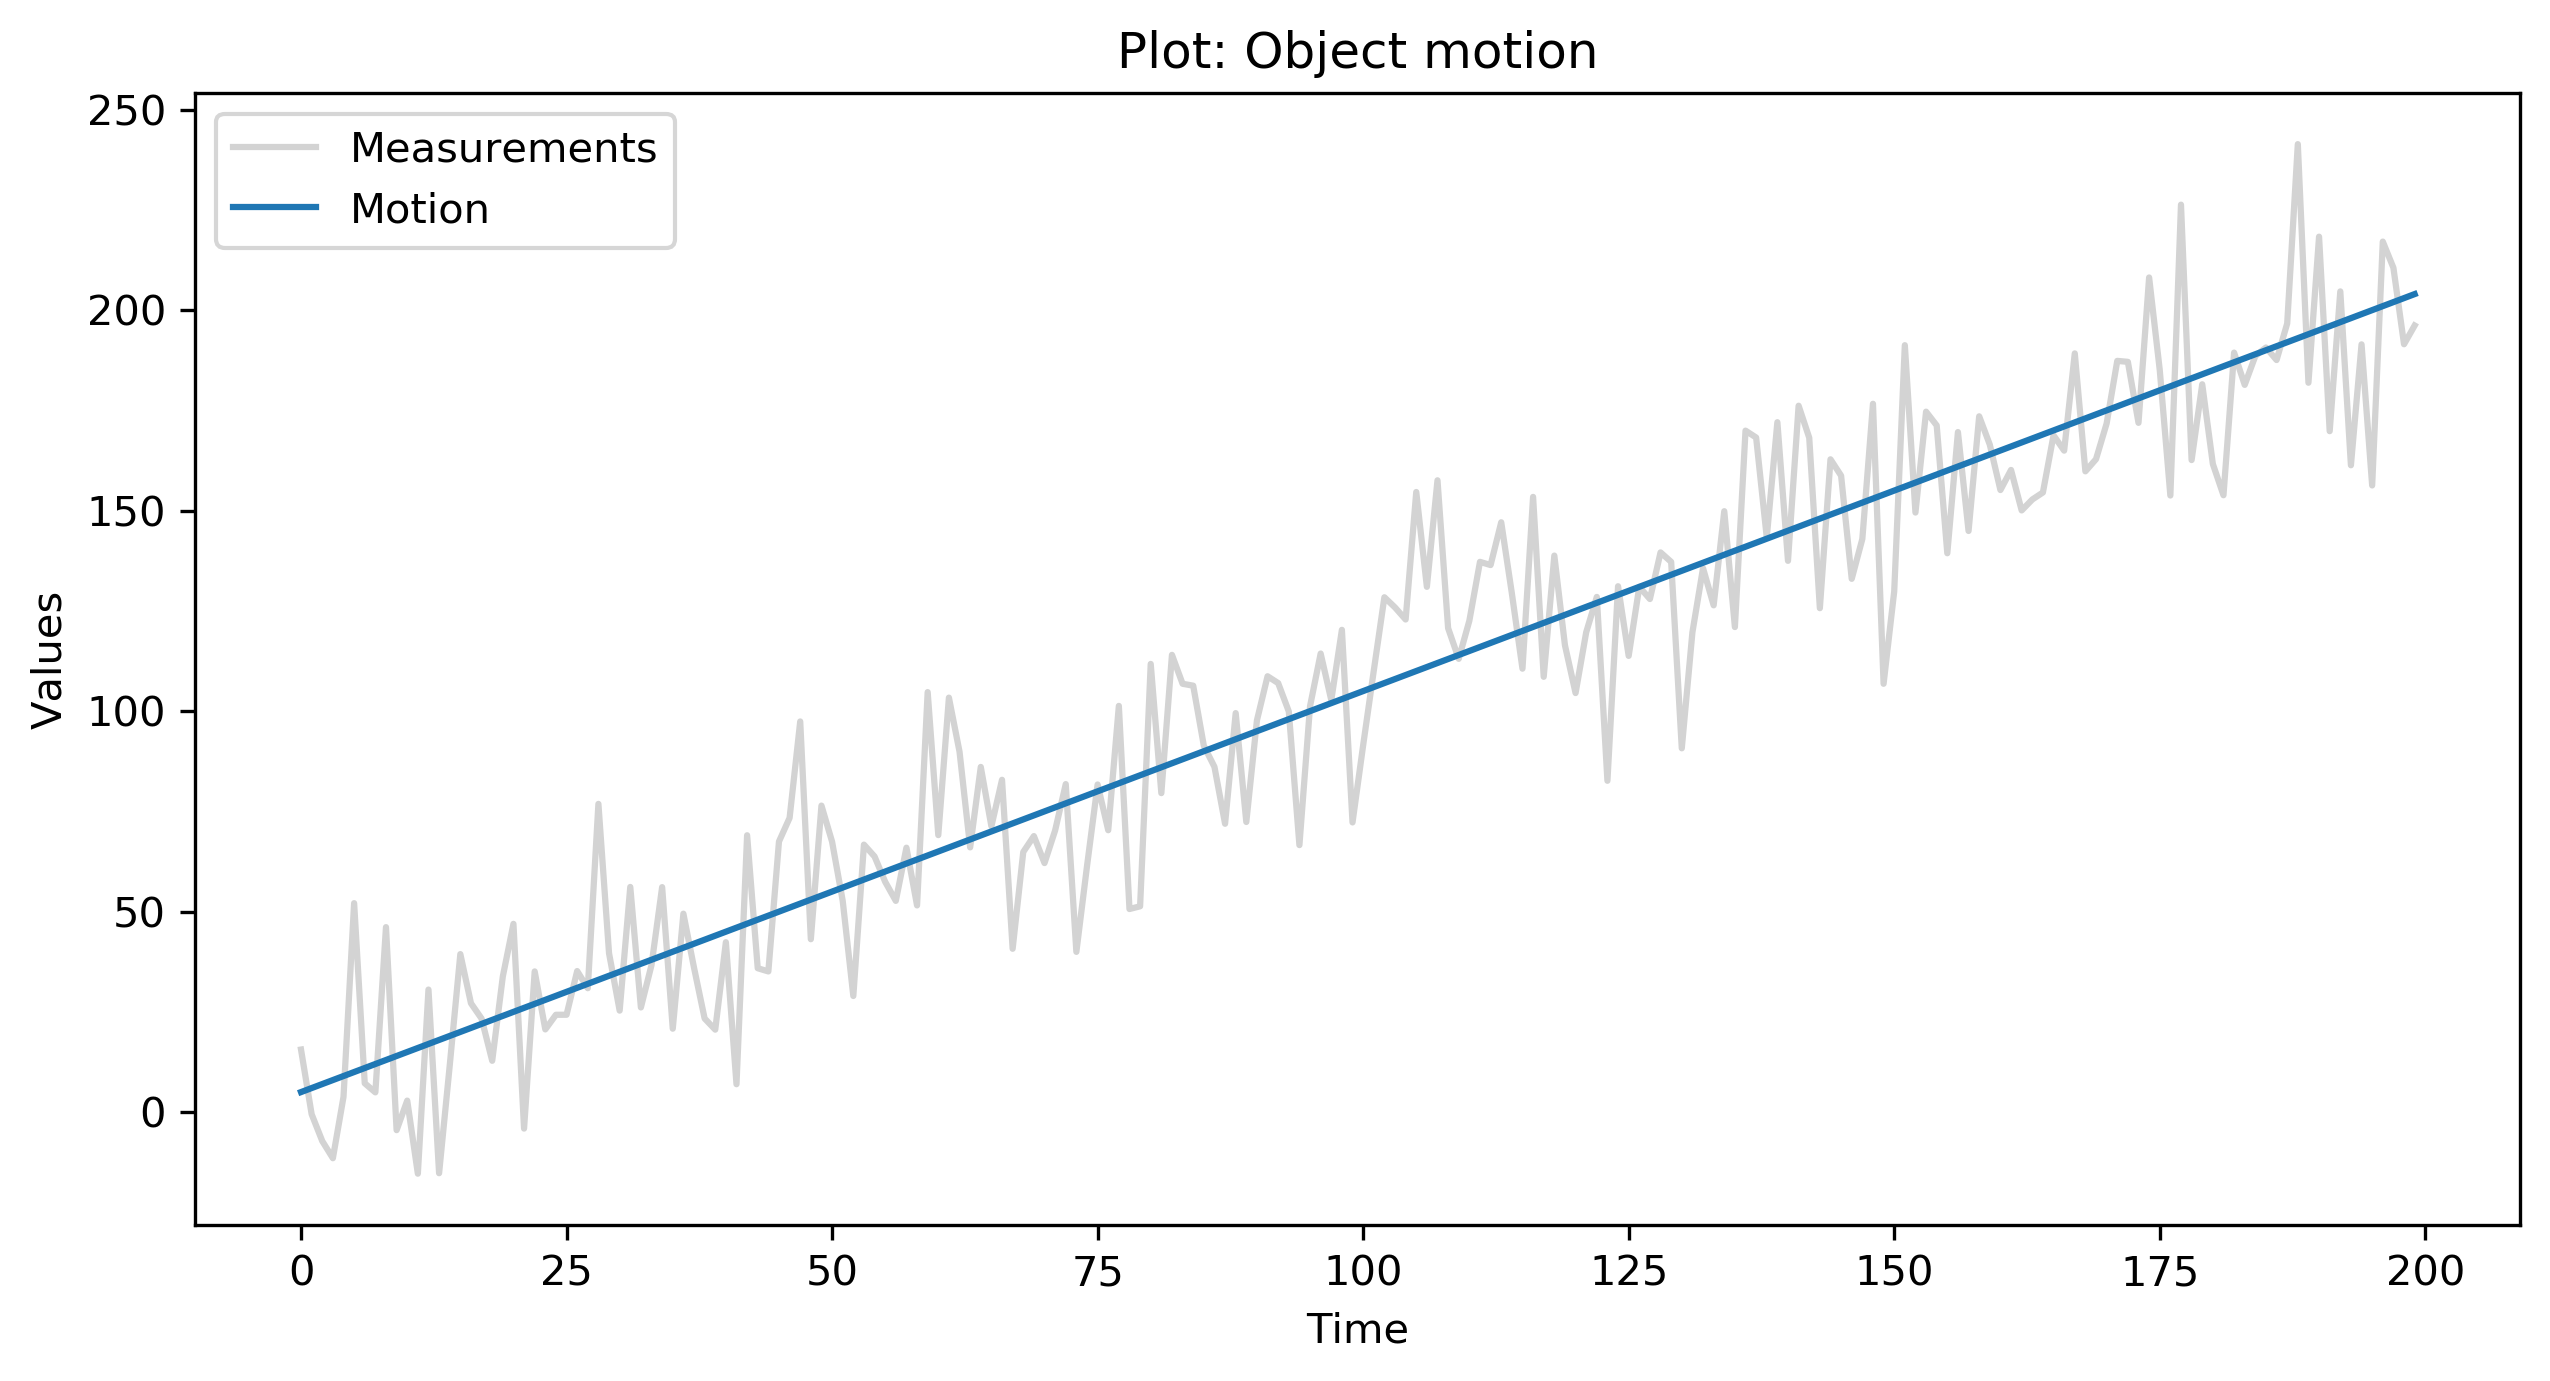

array([[  5.,   1.],
       [  6.,   1.],
       [  7.,   1.],
       [  8.,   1.],
       [  9.,   1.],
       [ 10.,   1.],
       [ 11.,   1.],
       [ 12.,   1.],
       [ 13.,   1.],
       [ 14.,   1.],
       [ 15.,   1.],
       [ 16.,   1.],
       [ 17.,   1.],
       [ 18.,   1.],
       [ 19.,   1.],
       [ 20.,   1.],
       [ 21.,   1.],
       [ 22.,   1.],
       [ 23.,   1.],
       [ 24.,   1.],
       [ 25.,   1.],
       [ 26.,   1.],
       [ 27.,   1.],
       [ 28.,   1.],
       [ 29.,   1.],
       [ 30.,   1.],
       [ 31.,   1.],
       [ 32.,   1.],
       [ 33.,   1.],
       [ 34.,   1.],
       [ 35.,   1.],
       [ 36.,   1.],
       [ 37.,   1.],
       [ 38.,   1.],
       [ 39.,   1.],
       [ 40.,   1.],
       [ 41.,   1.],
       [ 42.,   1.],
       [ 43.,   1.],
       [ 44.,   1.],
       [ 45.,   1.],
       [ 46.,   1.],
       [ 47.,   1.],
       [ 48.,   1.],
       [ 49.,   1.],
       [ 50.,   1.],
       [ 51.,   1.],
       [ 52.,

In [16]:
X1 = np.matrix((5,1))
F = np.matrix(((1,t),(0,1)))
G = np.matrix((t**2/2,t)).T
H = np.matrix((1,0))

X = np.zeros([c,2])
X[0] = X1
for i in range (1,c):
    frst = np.matmul(F,np.asmatrix(X[i-1]).T)
    scnd = G.dot(a[i-1])
    X[i] = np.add(frst,scnd).T
    
Z = np.zeros(c)
for i in range (c):
    Z[i] = H.dot(X[i])+n[i]

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion')
plt.plot(Z, label='Measurements',c='lightgrey')
plt.plot(X.T[0], label='Motion')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
X

In [5]:
#Developing Kalman Filter
X0 = np.matrix((2,0))
P00 = np.matrix(((10000,0),(0,10000)))

#Covariance matrix Q
Q = np.matmul(G,G.T)*s2a
R = s2n
I = np.matrix(((1,0),(0,1)))

#Kalman filtering
P = P00
X_f = np.zeros([c,2])
K_f = np.zeros([c,2])
K_f[0] = (1,1)
P_g = np.zeros(c)
X_f[0] = X0
for i in range (1,c):
    X_p = F.dot(np.asmatrix(X_f[i-1]).T)
    Pz = np.add(F.dot(P).dot(F.T),Q)
    frst = np.add(H.dot(Pz).dot(H.T),R)
    K = Pz.dot(H.T).dot(np.linalg.inv(frst))
    pre_scnd = np.subtract(Z[i],H.dot(X_p))
    scnd = K.dot(pre_scnd)
    P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
    X_f[i] = np.add(X_p,scnd).T
    K_f[i] = K.T
    P_g[i] = np.sqrt(P[0,0])
#deleting first row
K_f = np.delete(K_f, 0, 0)
P_g = np.delete(P_g, 0, 0)

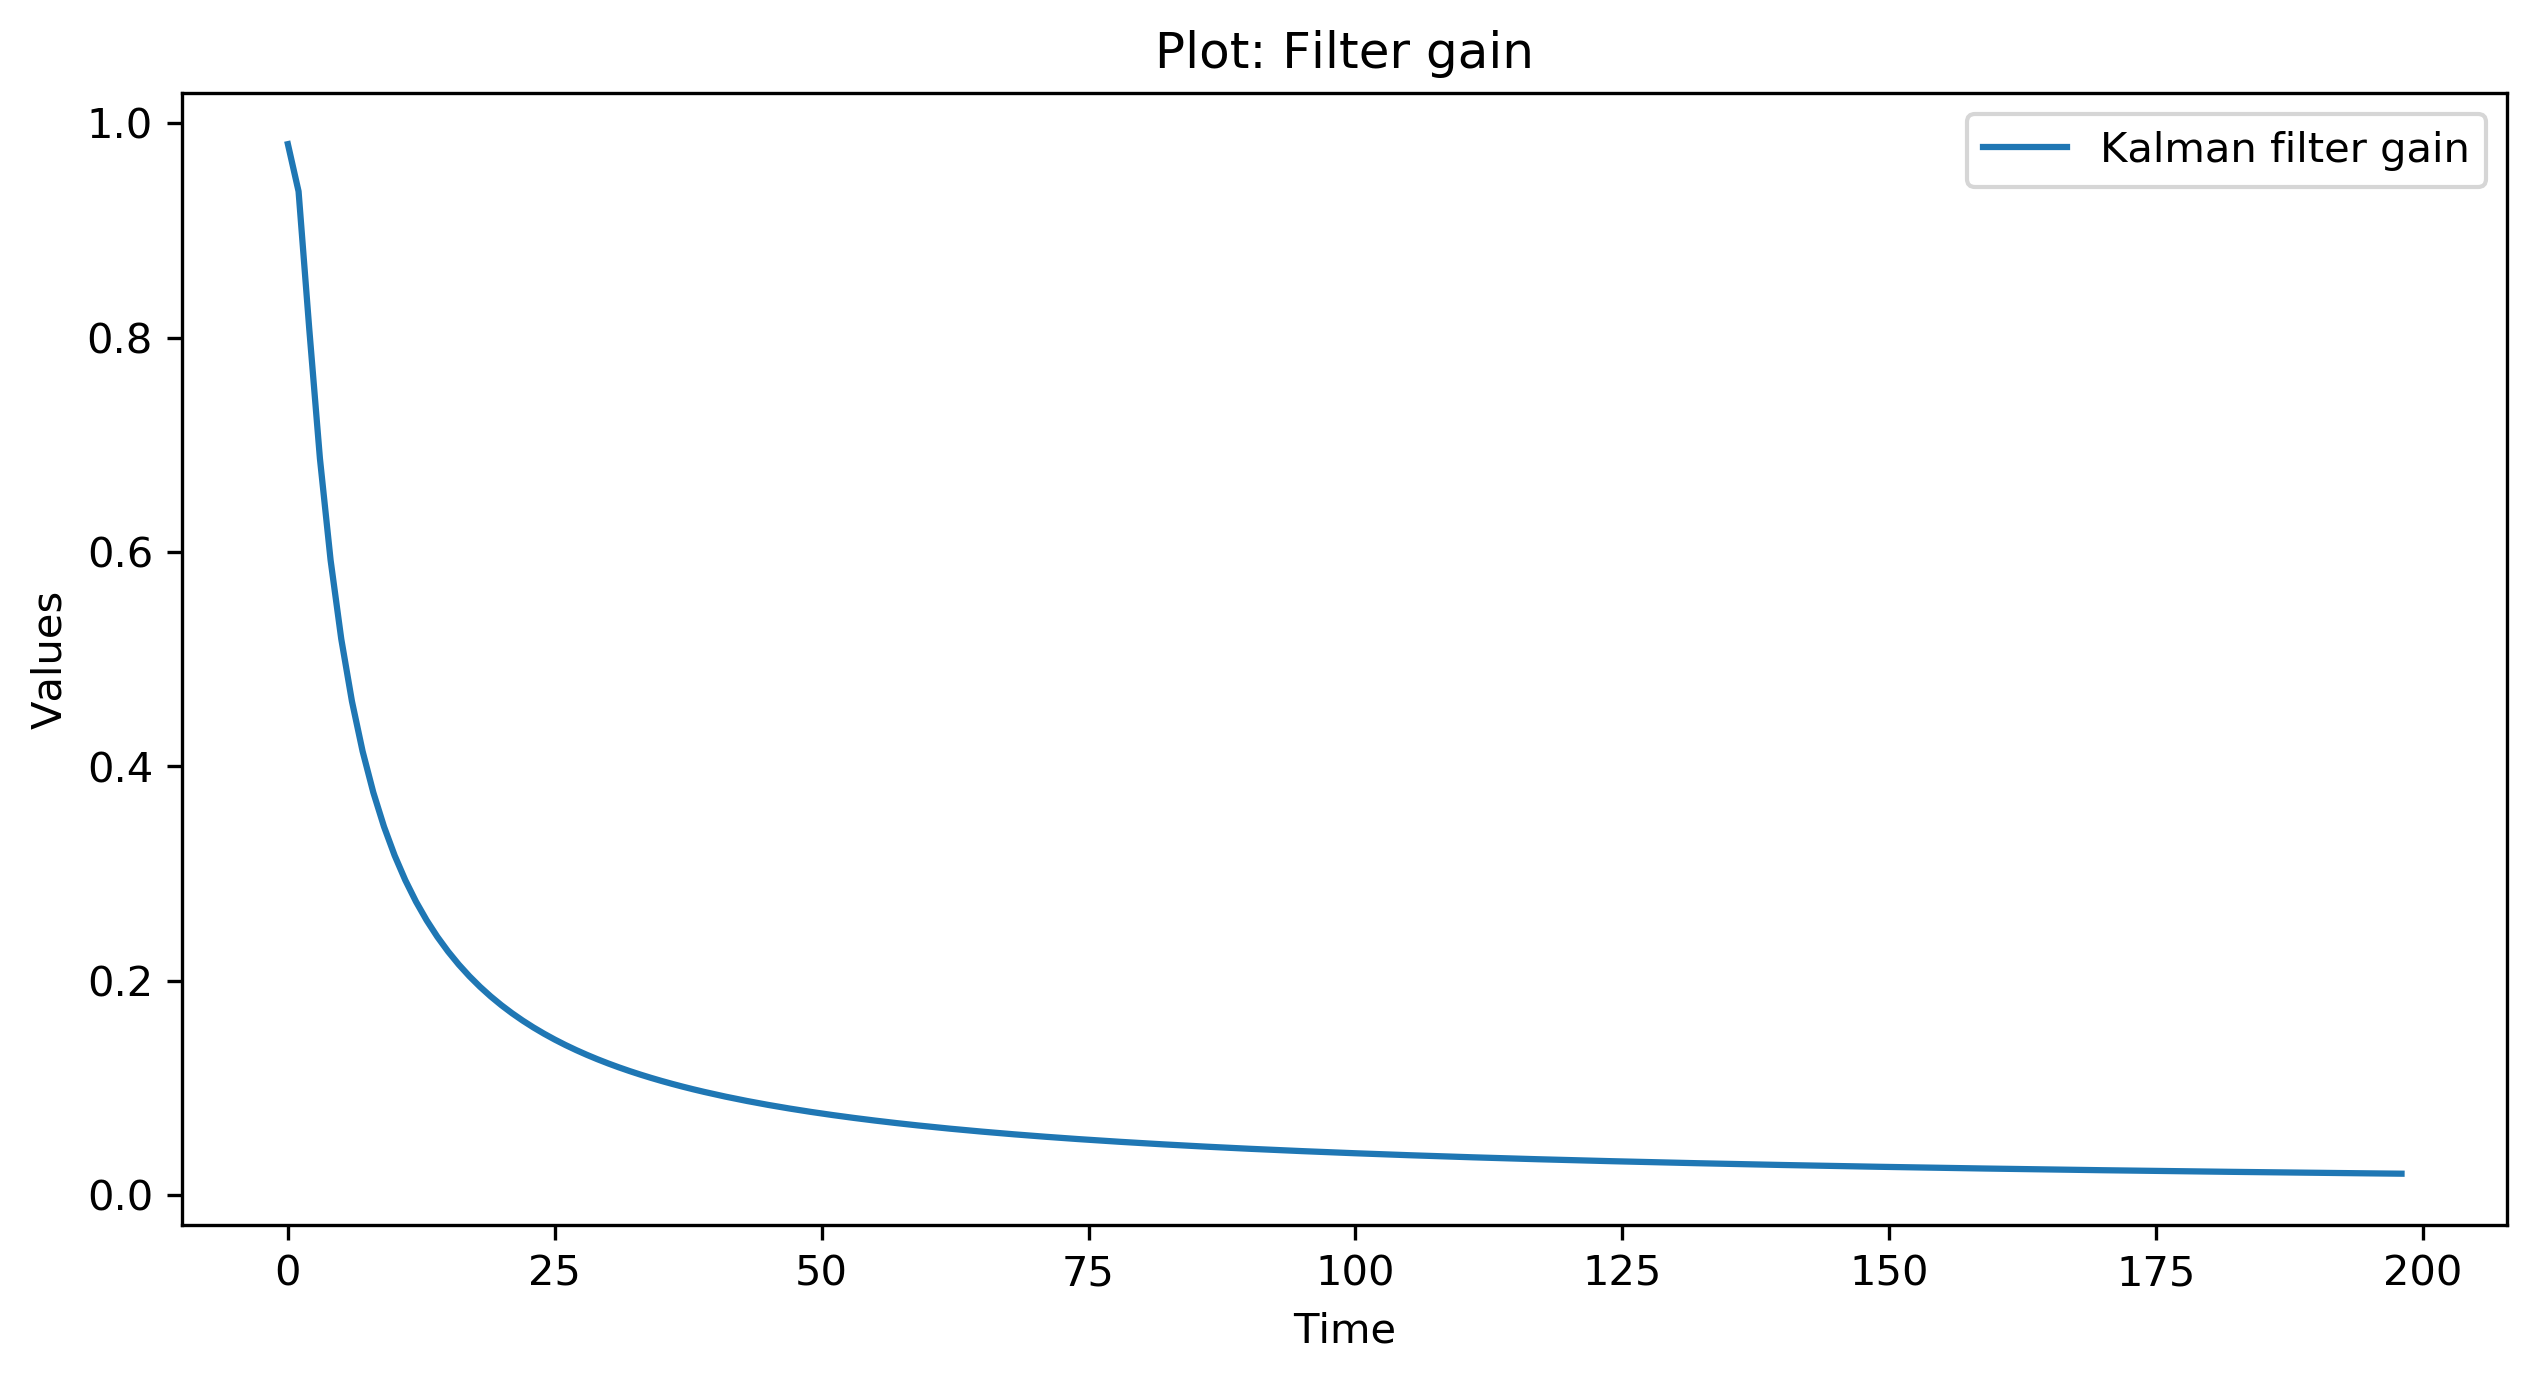

In [6]:
#6 Plot filter gain K
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Filter gain')    
plt.plot(K_f.T[0], label='Kalman filter gain')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [7]:
def run(n,seven=False, P_init=np.matrix(((10000,0),(0,10000))) ):
    def gen():
        a = np.random.normal(0,sa,c)
        n = np.random.normal(0,sn,c)
        X1 = np.matrix((5,1))
        F = np.matrix(((1,t),(0,1)))
        G = np.matrix((t**2/2,t)).T
        H = np.matrix((1,0))

        X = np.zeros([c,2])
        X[0] = X1
        for i in range (1,c):
            frst = np.matmul(F,np.asmatrix(X[i-1]).T)
            scnd = G.dot(a[i-1])
            X[i] = np.add(frst,scnd).T
        Z = np.zeros(c)
        for i in range (c):
            Z[i] = H.dot(X[i])+n[i]
        return X.T,Z
        
    def kalman(z_g):
        P = P_init
        X_f = np.zeros([c,2])
        X_f7 = np.zeros([c-7,2])
        X_f[0] = X0
        F7 = F
        for i in range (6):
            F7 = F7.dot(F)
        for i in range (1,c):
            X_p = F.dot(np.asmatrix(X_f[i-1]).T)
            Pz = np.add(F.dot(P).dot(F.T),Q)
            frst = np.add(H.dot(Pz).dot(H.T),R)
            K = Pz.dot(H.T).dot(np.linalg.inv(frst))
            pre_scnd = np.subtract(z_g[i],H.dot(X_p))
            scnd = K.dot(pre_scnd)
            P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
            X_f[i] = np.add(X_p,scnd).T
            if i < c-7 and seven:
                X_f7[i] = np.matmul(F7,X_f[i])
        if(seven):
             return X_f7.T
        else:
            return X_f.T
    
    if seven:
        co = c-7
    else:
        co = c
    error = np.zeros(co)
    for i in range (n):
        cur_x,cur_z = gen()
        res = kalman(cur_z)
        if seven:
            for i in range (7):
                cur_x = np.delete(cur_x, i, 1)
        s = np.power(np.subtract(cur_x[0],res[0]),2)    
        error = np.add(s,error)
    final = np.zeros(co)
    for k in range (2,co):
        final[k] = np.sqrt(error[k]/(n-1))
    return final

In [8]:
err_k = run(500)
err_k7 = run(500,True)

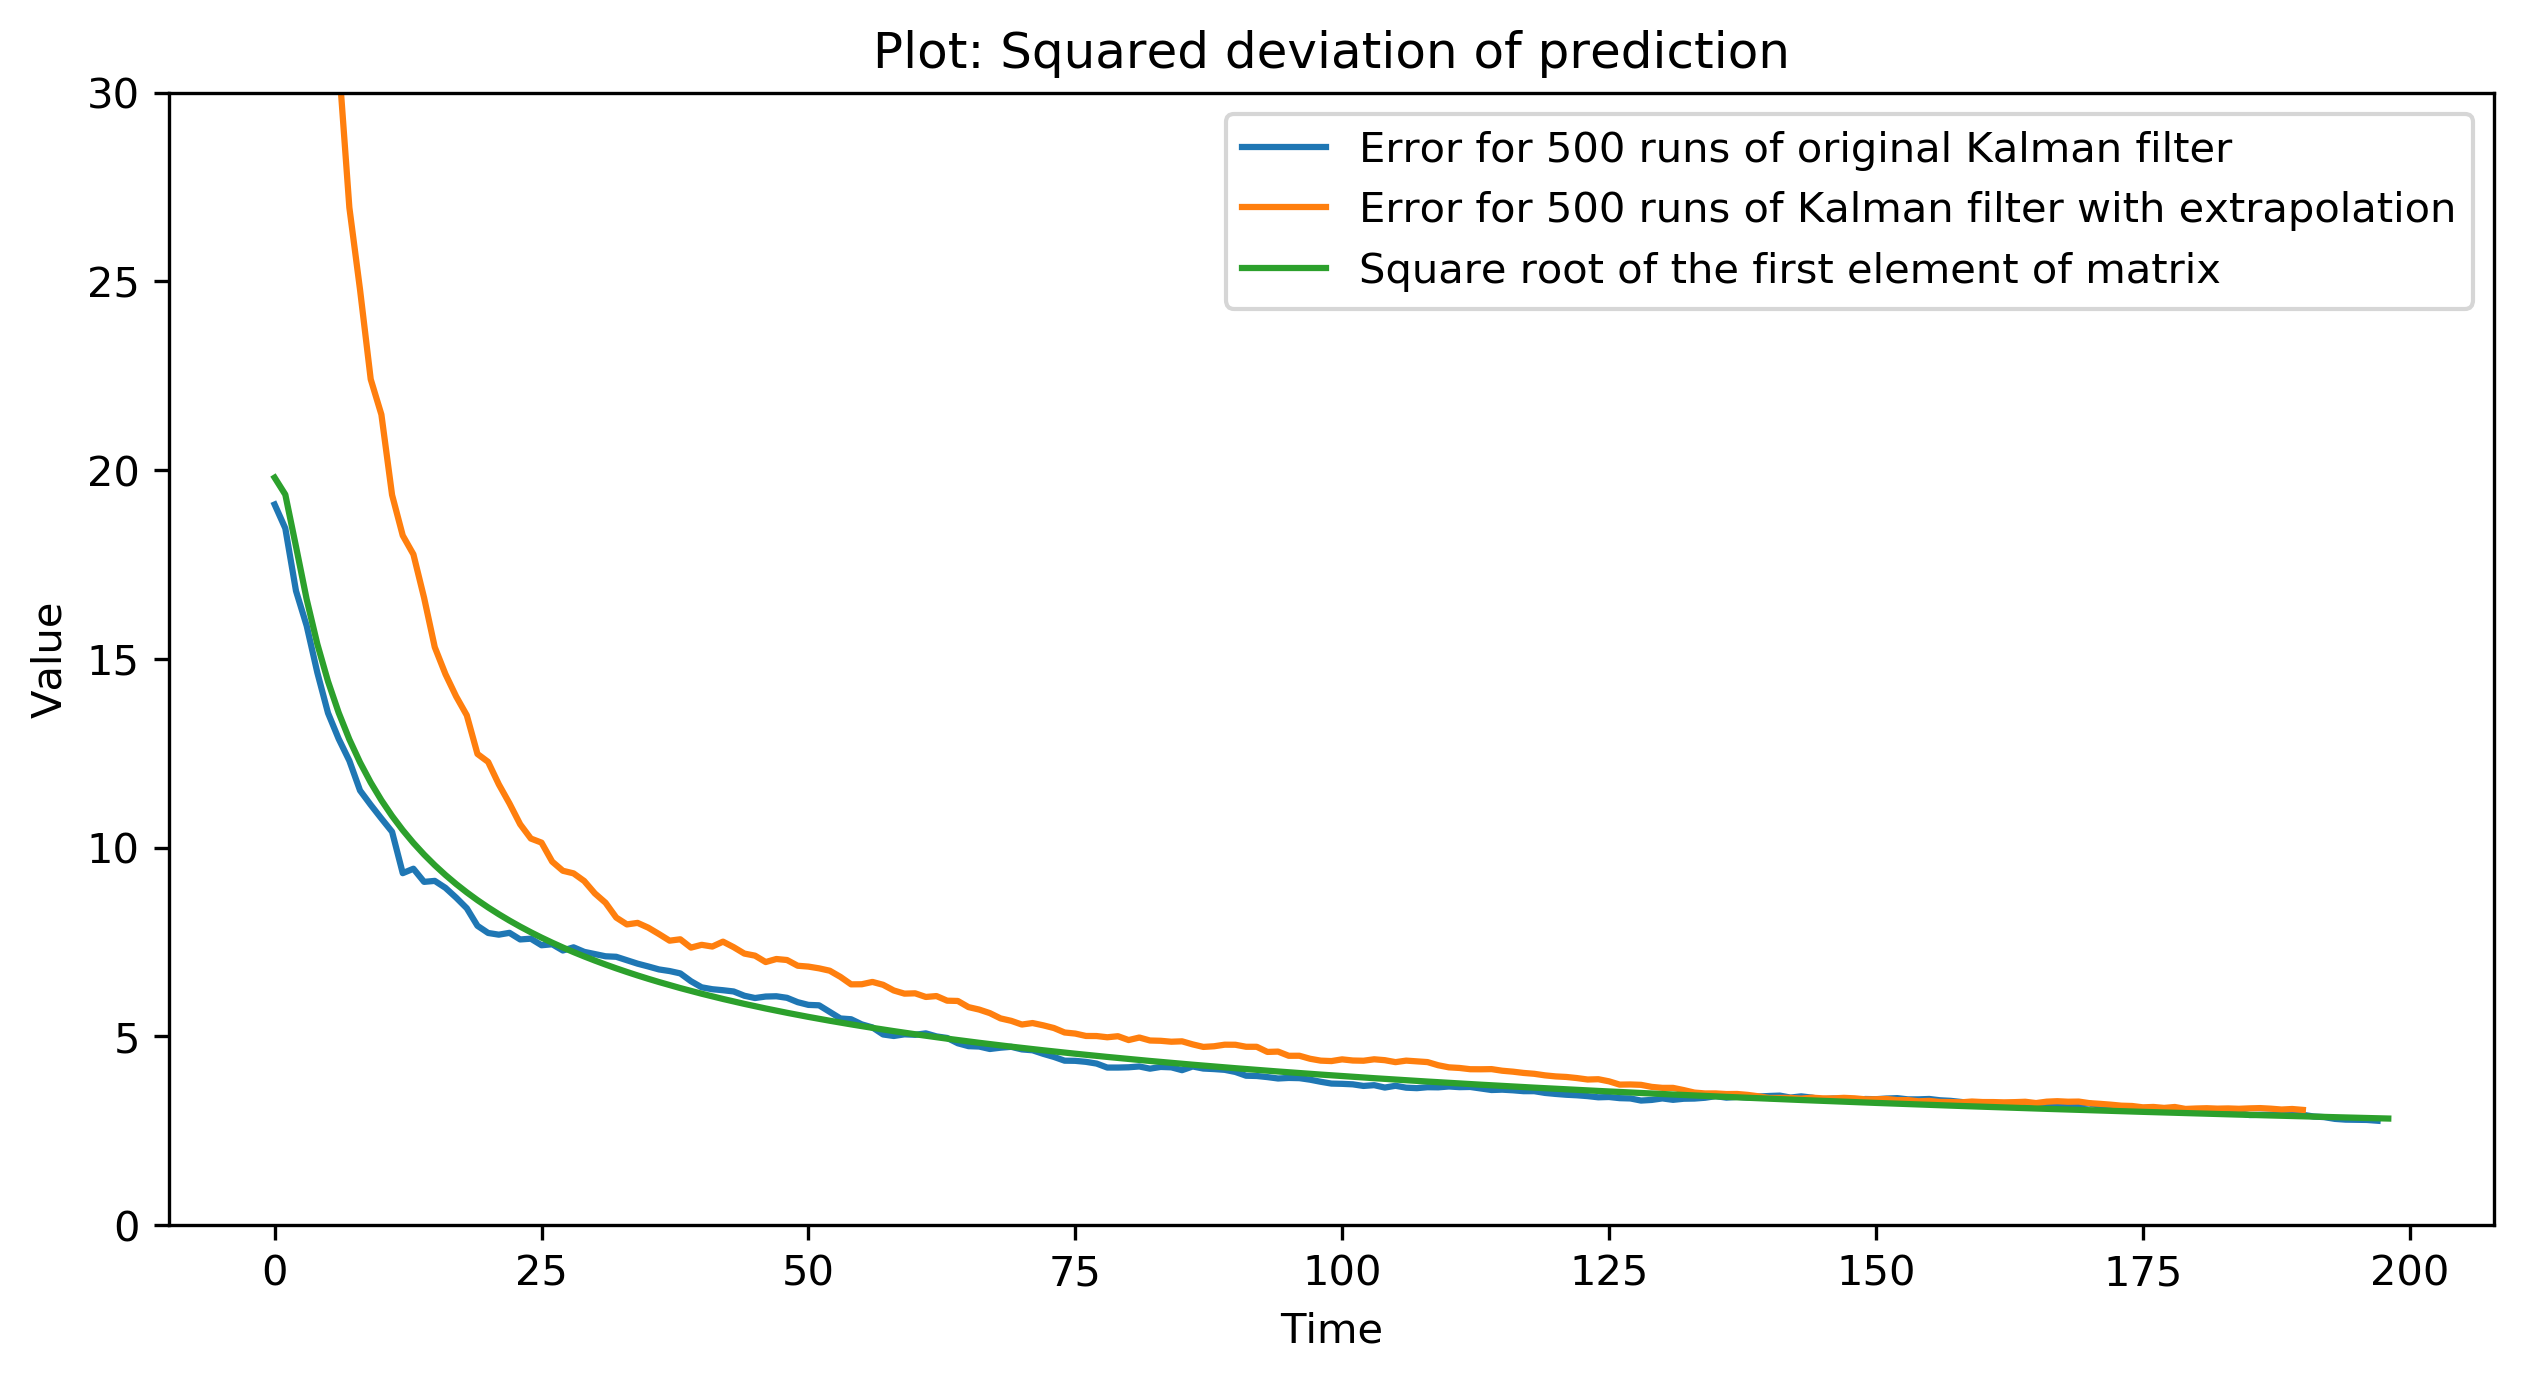

In [11]:
#deleting first row
err_k = np.delete(err_k, 0)
err_k7 = np.delete(err_k7, 0)

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Squared deviation of prediction')
plt.plot(err_k, label='Error for 500 runs of original Kalman filter')
plt.plot(err_k7, label='Error for 500 runs of Kalman filter with extrapolation')
plt.plot(P_g, label='Standard deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim((0, 30))
plt.legend()
plt.show()

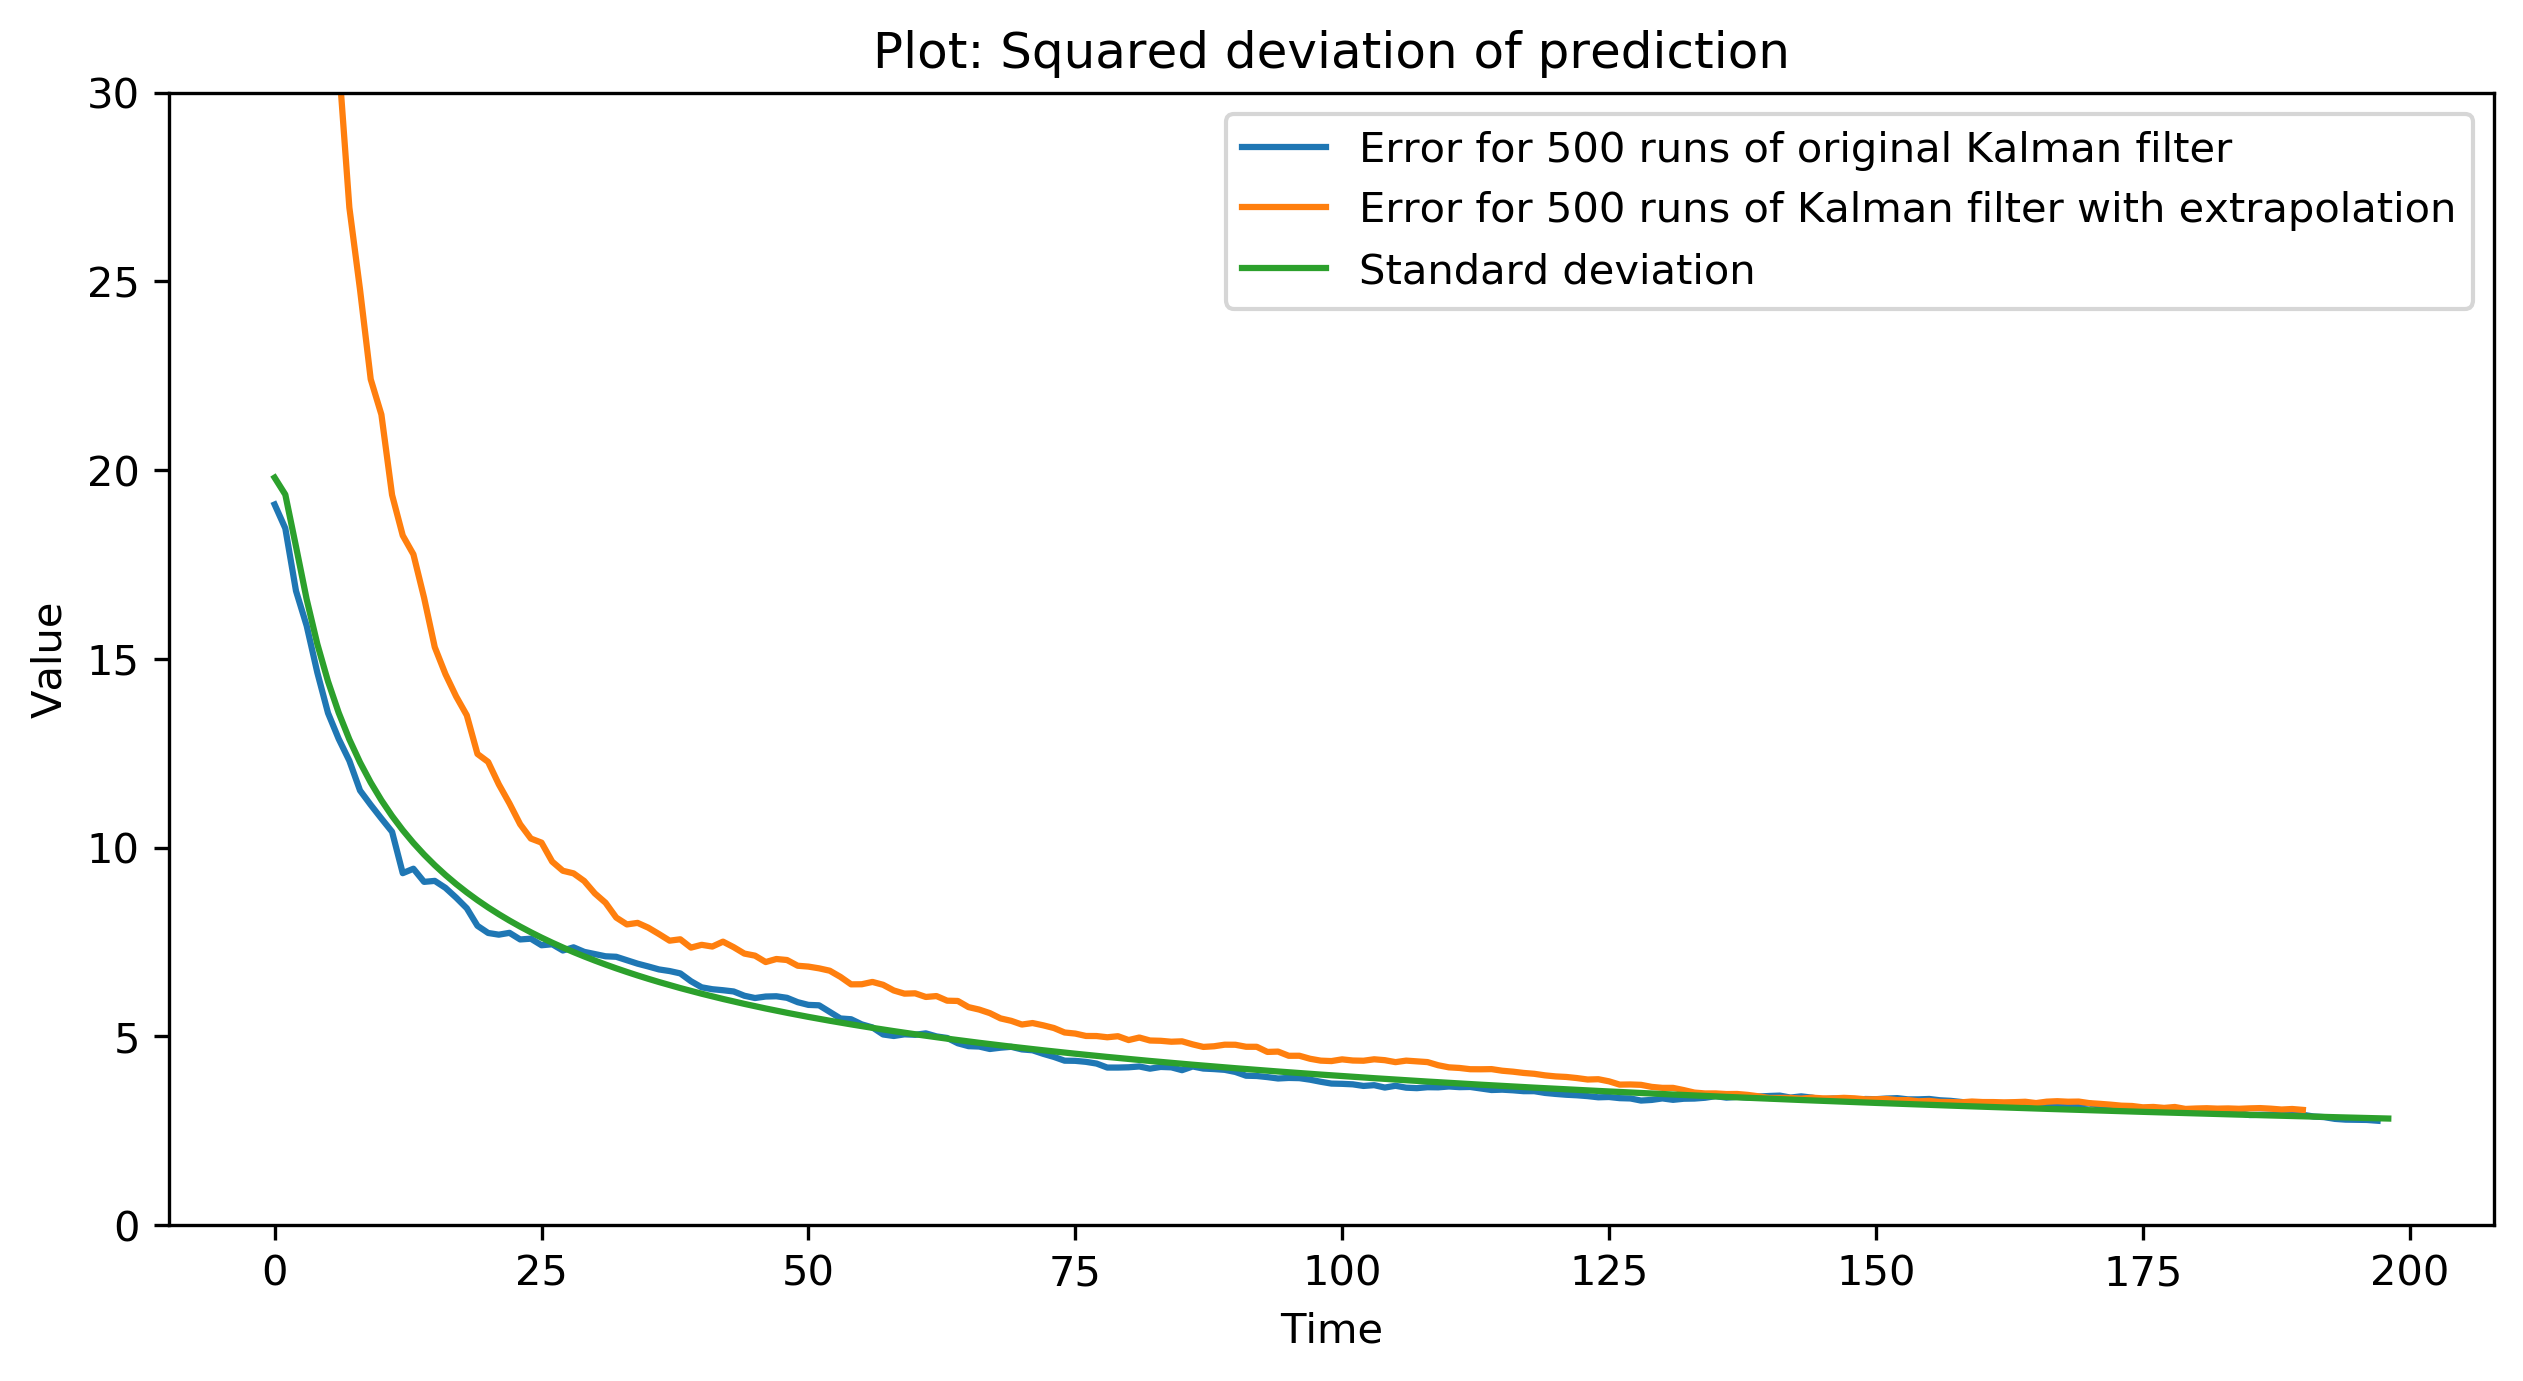

In [12]:
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Squared deviation of prediction')
plt.plot(err_k, label='Error for 500 runs of original Kalman filter')
plt.plot(err_k7, label='Error for 500 runs of Kalman filter with extrapolation')
plt.plot(P_g, label='Standard deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim((0, 30))
plt.legend()
plt.show()